In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor as GBR
from matplotlib import pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [2]:
LA_co2 = pd.read_csv("./data/LA_CO2_weather.csv")

In [3]:
jan_data = LA_co2[LA_co2["Time"].str.startswith("2018-01")]
feb_data = LA_co2[LA_co2["Time"].str.startswith("2018-02")]
mar_data = LA_co2[LA_co2["Time"].str.startswith("2018-03")]
apr_data = LA_co2[LA_co2["Time"].str.startswith("2018-04")]
may_data = LA_co2[LA_co2["Time"].str.startswith("2018-05")]
jun_data = LA_co2[LA_co2["Time"].str.startswith("2018-06")]
jul_data = LA_co2[LA_co2["Time"].str.startswith("2018-07")]
aug_data = LA_co2[LA_co2["Time"].str.startswith("2018-08")]
sep_data = LA_co2[LA_co2["Time"].str.startswith("2018-09")]
oct_data = LA_co2[LA_co2["Time"].str.startswith("2018-10")]
nov_data = LA_co2[LA_co2["Time"].str.startswith("2018-11")]
dec_data = LA_co2[LA_co2["Time"].str.startswith("2018-12")]

In [4]:
jan_data.replace([np.inf, -np.inf], np.nan, inplace=True)
feb_data.replace([np.inf, -np.inf], np.nan, inplace=True)
mar_data.replace([np.inf, -np.inf], np.nan, inplace=True)
apr_data.replace([np.inf, -np.inf], np.nan, inplace=True)
may_data.replace([np.inf, -np.inf], np.nan, inplace=True)
jun_data.replace([np.inf, -np.inf], np.nan, inplace=True)
jul_data.replace([np.inf, -np.inf], np.nan, inplace=True)
aug_data.replace([np.inf, -np.inf], np.nan, inplace=True)
sep_data.replace([np.inf, -np.inf], np.nan, inplace=True)
oct_data.replace([np.inf, -np.inf], np.nan, inplace=True)
nov_data.replace([np.inf, -np.inf], np.nan, inplace=True)
dec_data.replace([np.inf, -np.inf], np.nan, inplace=True)

jan_data["Temp (F)"].fillna(method='ffill', inplace=True)
feb_data["Temp (F)"].fillna(method='ffill', inplace=True)
mar_data["Temp (F)"].fillna(method='ffill', inplace=True)
apr_data["Temp (F)"].fillna(method='ffill', inplace=True)
may_data["Temp (F)"].fillna(method='ffill', inplace=True)
jun_data["Temp (F)"].fillna(method='ffill', inplace=True)
jul_data["Temp (F)"].fillna(method='ffill', inplace=True)
aug_data["Temp (F)"].fillna(method='ffill', inplace=True)
sep_data["Temp (F)"].fillna(method='ffill', inplace=True)
oct_data["Temp (F)"].fillna(method='ffill', inplace=True)
nov_data["Temp (F)"].fillna(method='ffill', inplace=True)
dec_data["Temp (F)"].fillna(method='ffill', inplace=True)

/Users/ruskinlines/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/Users/ruskinlines/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [5]:
classifiers = [jan_data, feb_data, mar_data, apr_data, may_data, jun_data,
               jul_data, aug_data, sep_data, oct_data, nov_data, dec_data]

In [6]:
future_scores = []
same_scores = []

for i, classifier in enumerate(classifiers):
    model = GBR(n_estimators = 100, max_depth=1).fit(classifier["Temp (F)"][24:]
                                                     .values.reshape(-1,1), classifier["Temp (F)"].shift(24)[24:])
    
    same_scores.append(model.score(classifier["Temp (F)"][24:].values.reshape(-1,1),
                classifier["Temp (F)"].shift(24)[24:]))
    if i < 11:
        future_scores.append(model.score(classifiers[i+1]["Temp (F)"][24:].values.reshape(-1,1),
                    classifiers[i+1]["Temp (F)"].shift(24)[24:]))



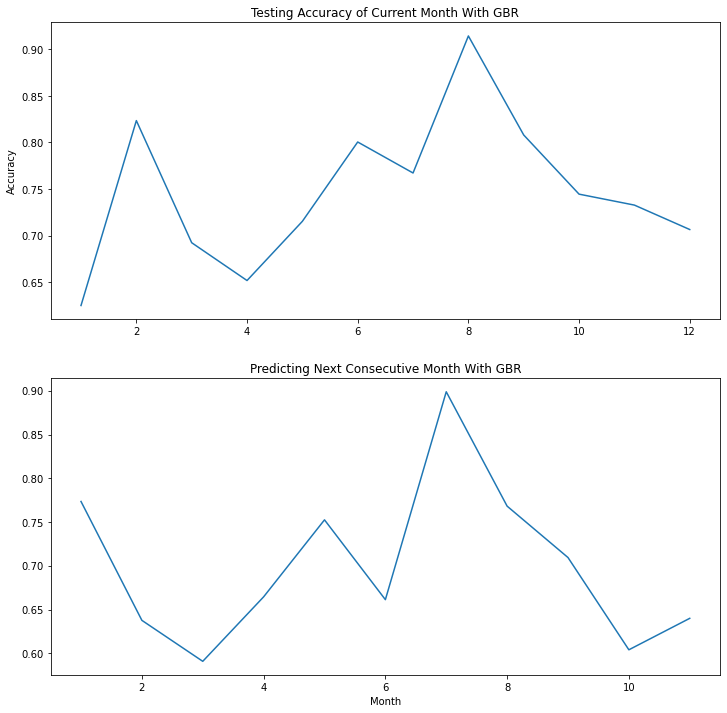

In [7]:
fig, axs = plt.subplots(2, figsize=(12,12))
axs[0].plot(range(1,13), same_scores)
axs[0].set_title("Testing Accuracy of Current Month With GBR")
axs[0].set_ylabel("Accuracy")

axs[1].plot(range(1,12), future_scores)
axs[1].set_title("Predicting Next Consecutive Month With GBR")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Month")
plt.savefig("./AccuracyGraphs/GBCAccuracy")
plt.show()


In [8]:
predictions_gbr = []
predictions_future_gbr = []
actuals_gbr = []

for i, classifier in enumerate(classifiers):
    model = GBR(n_estimators = 100, max_depth=1).fit(classifier["Temp (F)"][24:]
                                                     .values.reshape(-1,1), classifier["Temp (F)"].shift(24)[24:])
    predictions_gbr.append(model.predict(classifier["Temp (F)"][24:].values.reshape(-1,1)))
    if i < 11:
        predictions_future_gbr.append(model.predict(classifiers[i+1]["Temp (F)"][24:].values.reshape(-1,1)))
    actuals_gbr.append(classifier["Temp (F)"].shift(24)[24:].values.reshape(-1,1))

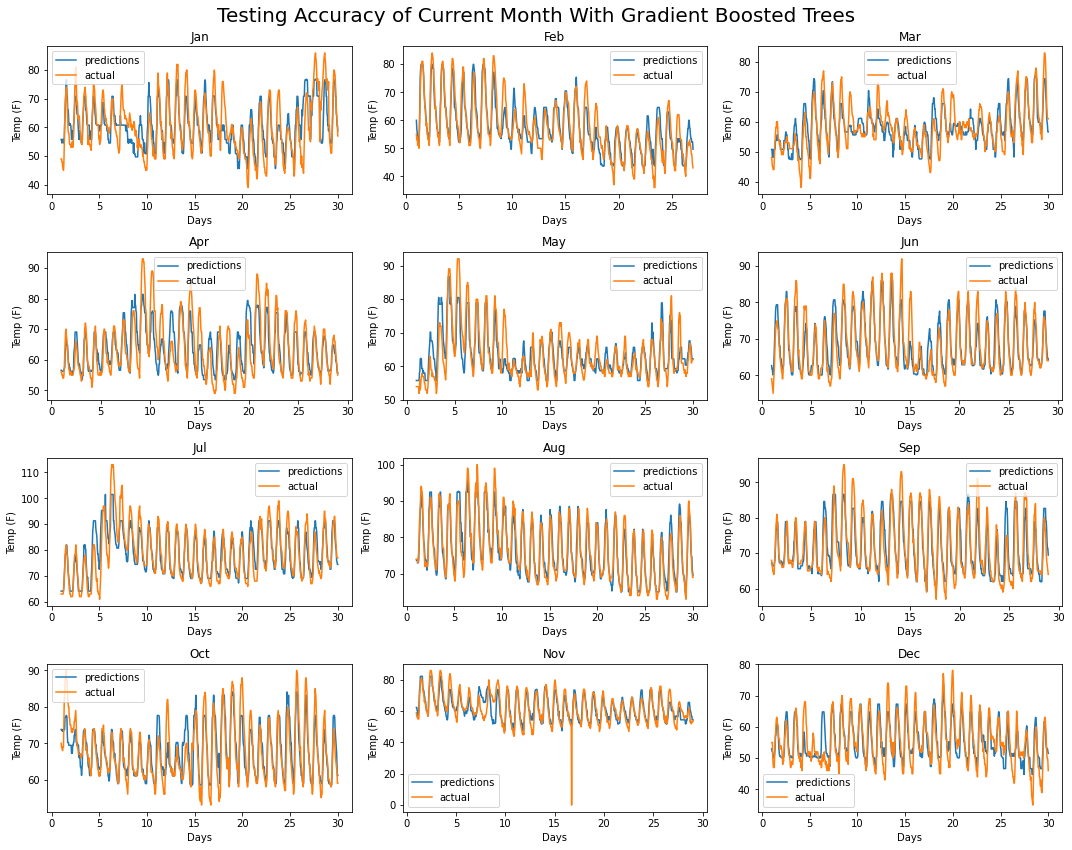

In [9]:
all_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

domain_func = lambda x: np.linspace(1, len(x) / 24, len(x))

fig, axs = plt.subplots(4, 3, figsize=(15,12))

for i in range(12):
    axis = axs[i // 3, i % 3]
    axis.plot(domain_func(predictions_gbr[i]), predictions_gbr[i], label="predictions")
    axis.plot(domain_func(actuals_gbr[i]), actuals_gbr[i], label="actual")
    axis.set_xlabel("Days")
    axis.set_ylabel("Temp (F)")
    axis.legend()
    axis.set_title(all_months[i])

fig.suptitle("Testing Accuracy of Current Month With Gradient Boosted Trees", size=20)
plt.tight_layout()

plt.savefig('./XGB_Gradient_Figures/gbcurrent.png', dpi=500)

plt.show()





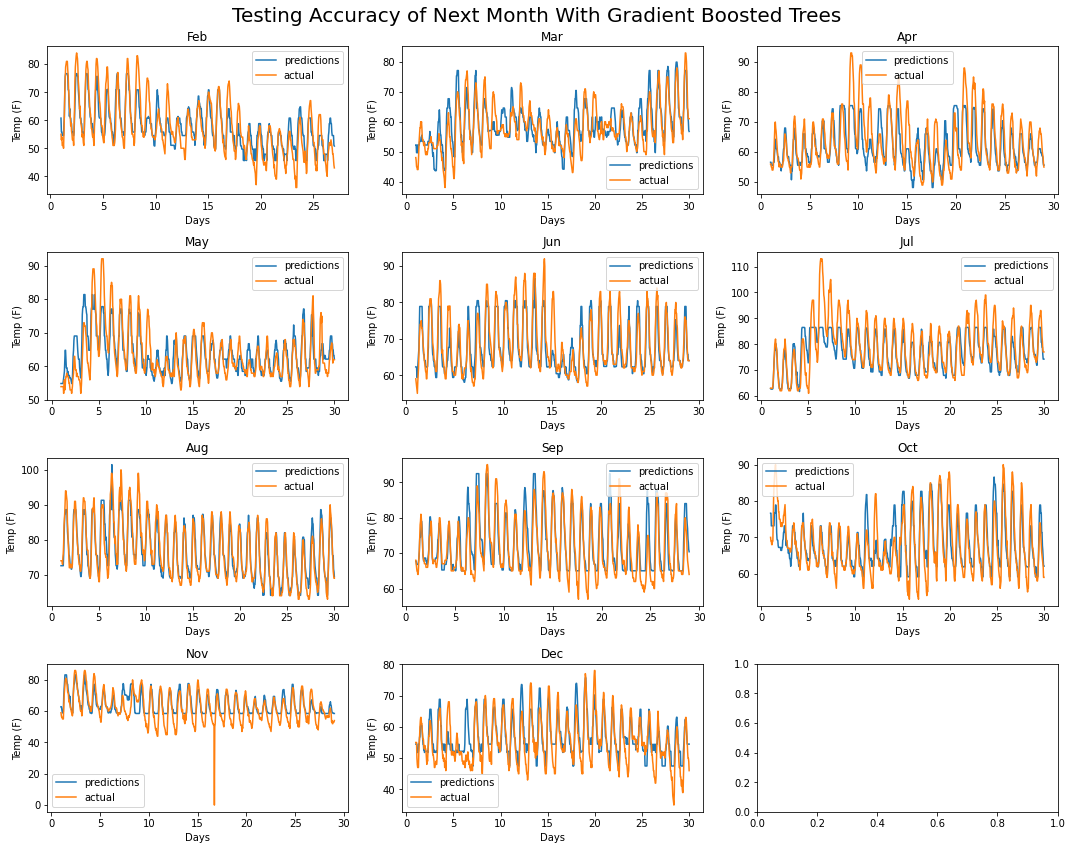

In [10]:
all_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

domain_func = lambda x: np.linspace(1, len(x) / 24, len(x))

fig, axs = plt.subplots(4, 3, figsize=(15,12))

for i in range(11):
    axis = axs[i // 3, i % 3]
    axis.plot(domain_func(predictions_future_gbr[i]), predictions_future_gbr[i], label="predictions")
    axis.plot(domain_func(actuals_gbr[i+1]), actuals_gbr[i+1], label="actual")
    axis.legend()
    axis.set_xlabel("Days")
    axis.set_ylabel("Temp (F)")
    axis.set_title(all_months[i+1])

fig.suptitle("Testing Accuracy of Next Month With Gradient Boosted Trees", size=20)
plt.tight_layout()


plt.savefig('./XGB_Gradient_Figures/gbfuture.png', dpi=500)

plt.show()



In [11]:

param_dist = {'objective':'reg:squarederror', 'n_estimators':1}

predictions = []
predictions_future = []
actuals = []
for classifier in classifiers:
    X_train = classifier["Temp (F)"][24:].values.reshape(-1,1)
    y_train = classifier["Temp (F)"].shift(24)[24:].values.reshape(-1,1)
    X_test = classifier["Temp (F)"][24:].values.reshape(-1,1)
    y_test = classifier["Temp (F)"].shift(24)[24:].values.reshape(-1,1)
    clf = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

    clf.fit(X_train, y_train)
    predictions.append(clf.predict(X_test))
    actuals.append(y_test)

for i, classifier in enumerate(classifiers[:-1]):
    X_train = classifier["Temp (F)"][24:].values.reshape(-1,1)
    y_train = classifier["Temp (F)"].shift(24)[24:].values.reshape(-1,1)
    X_test = classifiers[i + 1]["Temp (F)"][24:].values.reshape(-1,1)
    y_test = classifiers[i + 1]["Temp (F)"].shift(24)[24:].values.reshape(-1,1)
    clf = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

    clf.fit(X_train, y_train)
    predictions_future.append(clf.predict(X_test))


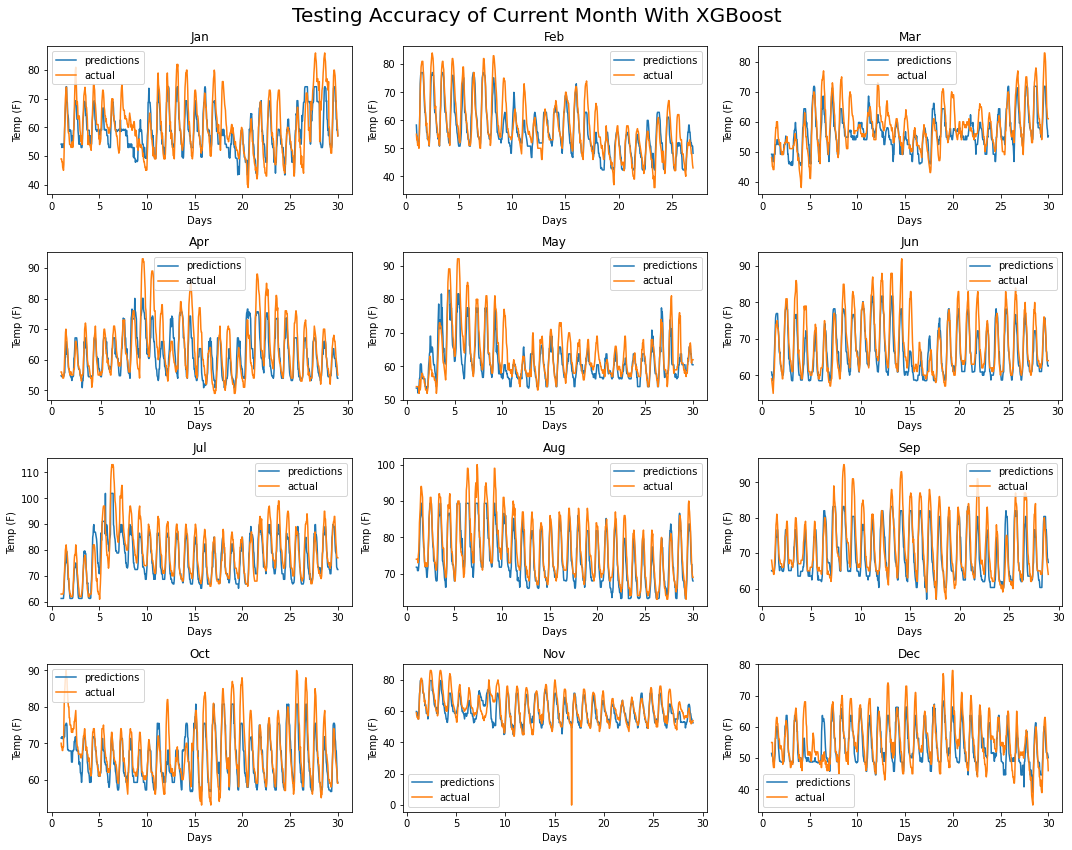

In [12]:
all_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

domain_func = lambda x: np.linspace(1, len(x) / 24, len(x))

fig, axs = plt.subplots(4, 3, figsize=(15,12))

for i in range(12):
    axis = axs[i // 3, i % 3]
    axis.plot(domain_func(predictions[i]), predictions[i], label="predictions")
    axis.plot(domain_func(actuals[i]), actuals[i], label="actual")
    axis.legend()
    axis.set_xlabel("Days")
    axis.set_ylabel("Temp (F)")
    axis.set_title(all_months[i])

fig.suptitle("Testing Accuracy of Current Month With XGBoost", size=20)
plt.tight_layout()

plt.savefig('./XGB_Gradient_Figures/xgbcurrent.png', dpi=500)

plt.show()




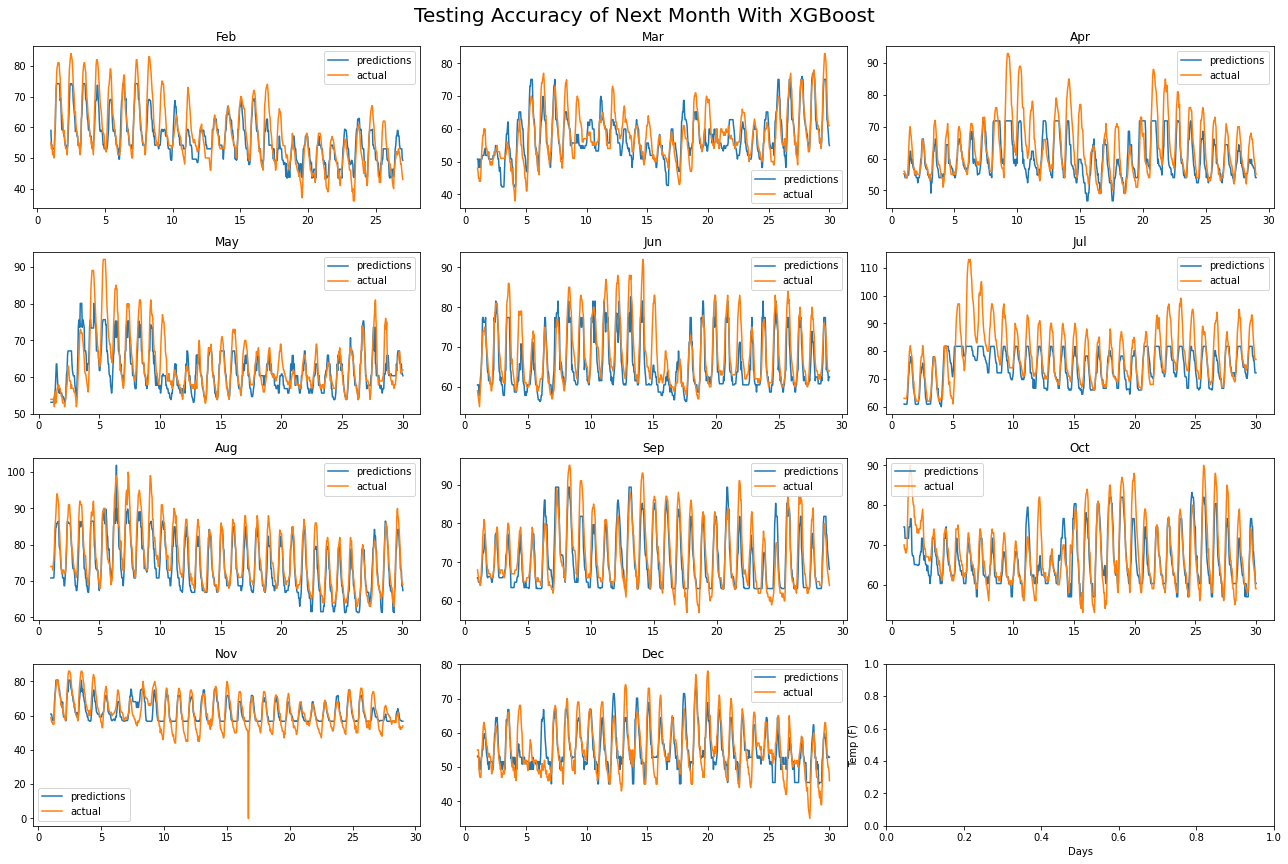

In [13]:
consec_months = ["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
fig, axs = plt.subplots(4, 3, figsize=(18,12))

domain_func = lambda x: np.linspace(1, len(x) / 24, len(x))

for i in range(11):
    axis = axs[i // 3, i % 3]
    axis.plot(domain_func(predictions_future[i]), predictions_future[i], label="predictions")
    axis.plot(domain_func(actuals[i+1]), actuals[i+1], label="actual")
    axis.legend()
    axis.set_title(consec_months[i])
    
fig.suptitle("Testing Accuracy of Next Month With XGBoost", size=20)
plt.tight_layout()
plt.xlabel("Days")
plt.ylabel("Temp (F)")

plt.savefig('./XGB_Gradient_Figures/xgbfuture.png', dpi=500)

plt.show()
